In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read files

transactions = pd.read_pickle('transactions_cleaned.pkl')
customers = pd.read_pickle('customers_cleaned.pkl')
articles = pd.read_csv('data/articles.csv.zip')

In [4]:
# filter relevant customers
customers = customers[(customers['age'] >= 35) & (customers['age'] <= 44)]


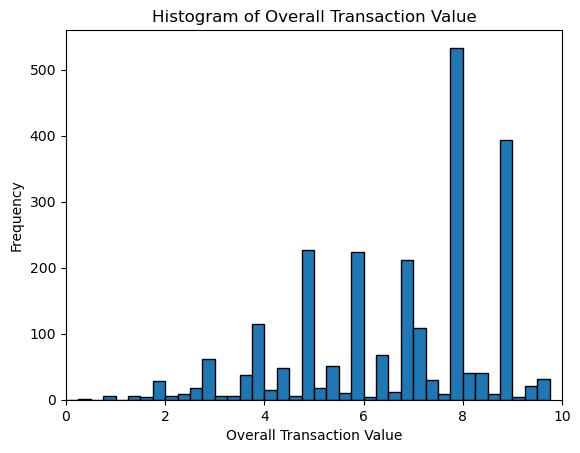

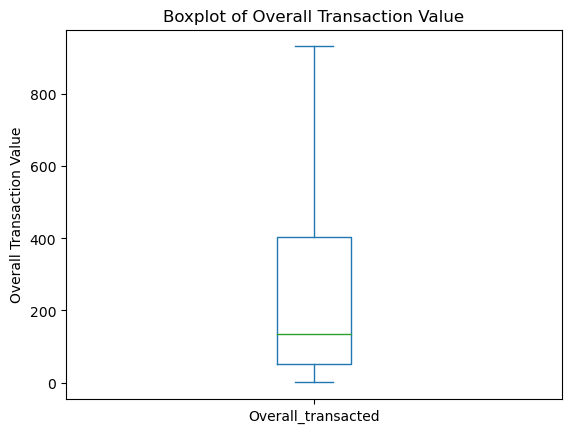

In [8]:
# seems like there's some masking of the transaction value. value spent is <5 for close to all cases. 
import numpy as np

bins = np.arange(0, 10, 0.25)
customers['Overall_transacted'].plot(kind='hist', edgecolor='black', bins = bins)
plt.xlabel('Overall Transaction Value')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Transaction Value')
plt.xlim(0, 10)
plt.show()

customers['Overall_transacted'].plot(kind='box', showfliers = False)
plt.ylabel('Overall Transaction Value')
plt.title('Boxplot of Overall Transaction Value')
plt.show()


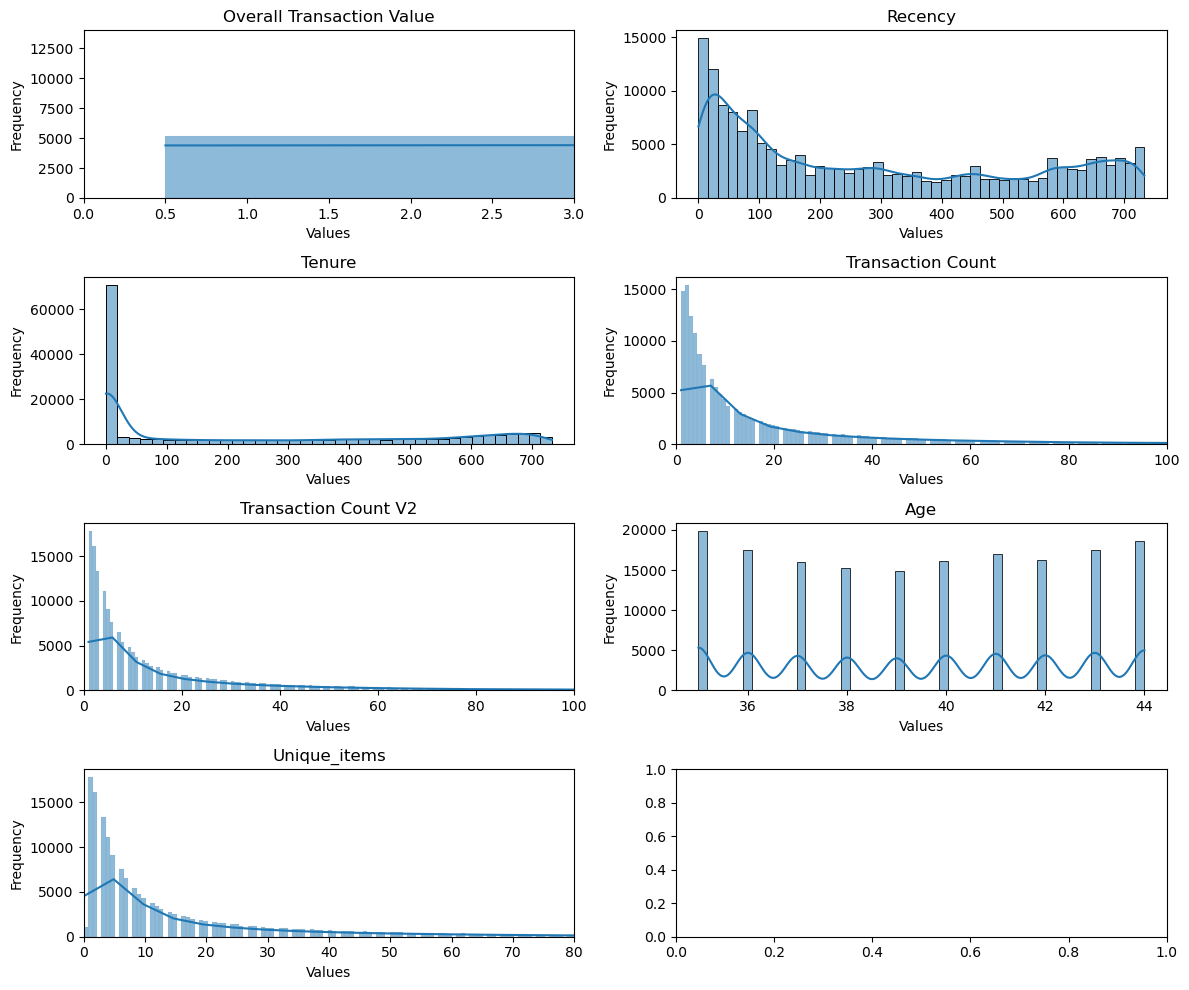

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Plot distribution 1
sns.histplot(data= customers, x='Overall_transacted', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Overall Transaction Value')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(0, 3)

# Plot distribution 2
sns.histplot(data= customers, x='Recency_days', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Recency')
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Frequency')
# axes[0, 1].set_xlim(0, 13)

# Plot distribution 3
sns.histplot(data= customers, x='Tenure_days', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Tenure')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
# axes[1, 0].set_xlim(0, 20)

# Plot distribution 4
sns.histplot(data= customers, x='Overall_transaction_count', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Transaction Count')
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, 100)

# Plot distribution 5
sns.histplot(data= customers, x='Transaction_count_revised', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Transaction Count V2')
axes[2, 0].set_xlabel('Values')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xlim(0, 100)

# Plot distribution 6
sns.histplot(data= customers, x='age', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Age')
axes[2, 1].set_xlabel('Values')
axes[2, 1].set_ylabel('Frequency')
# axes[1, 1].set_xlim(0, 400)

# Plot distribution 7
sns.histplot(data= customers, x='Unique_items', kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Unique_items')
axes[3, 0].set_xlabel('Values')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_xlim(0, 80)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

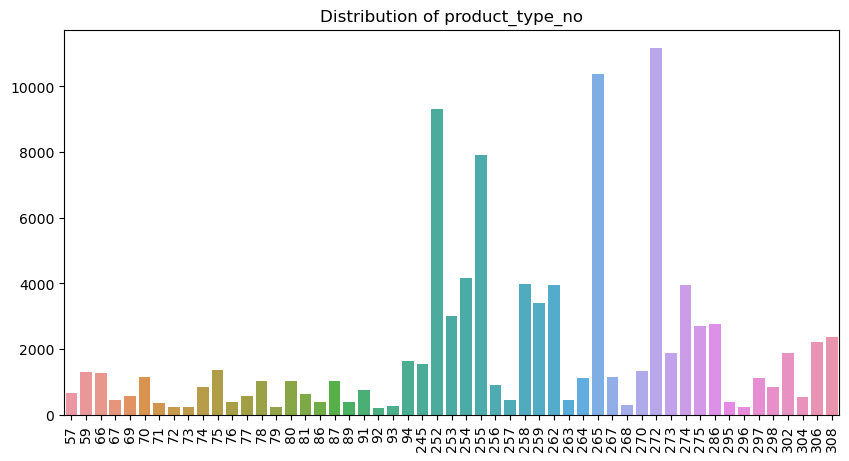

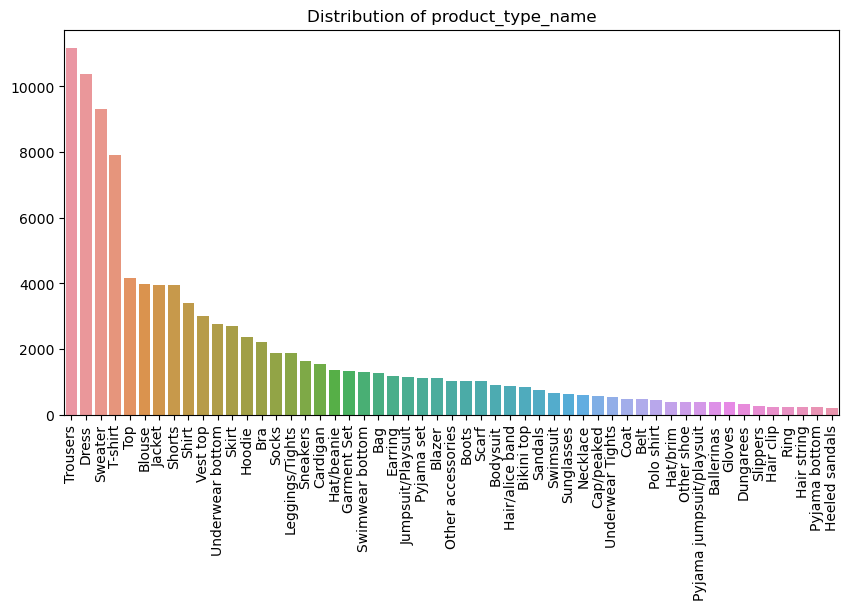

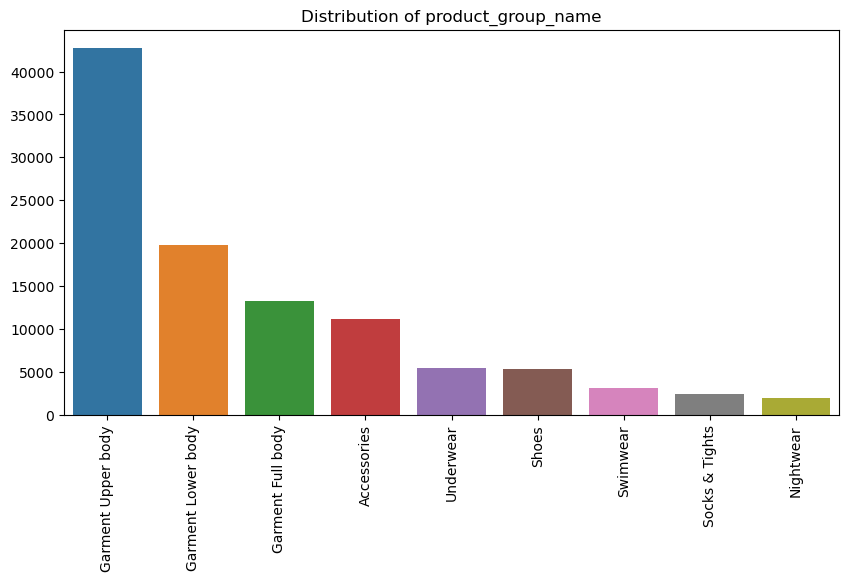

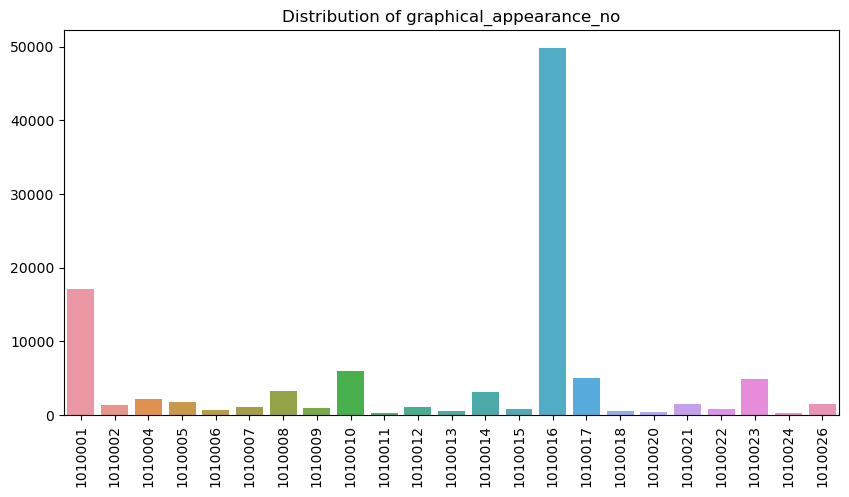

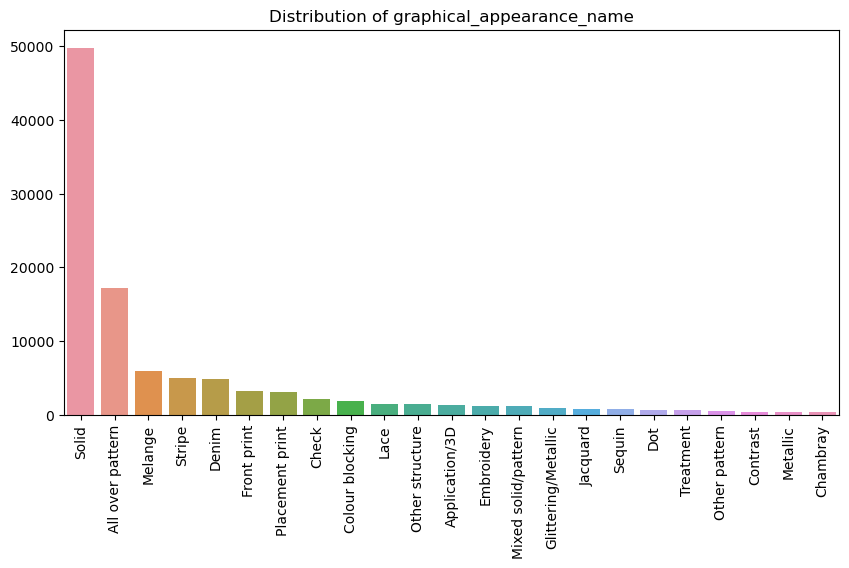

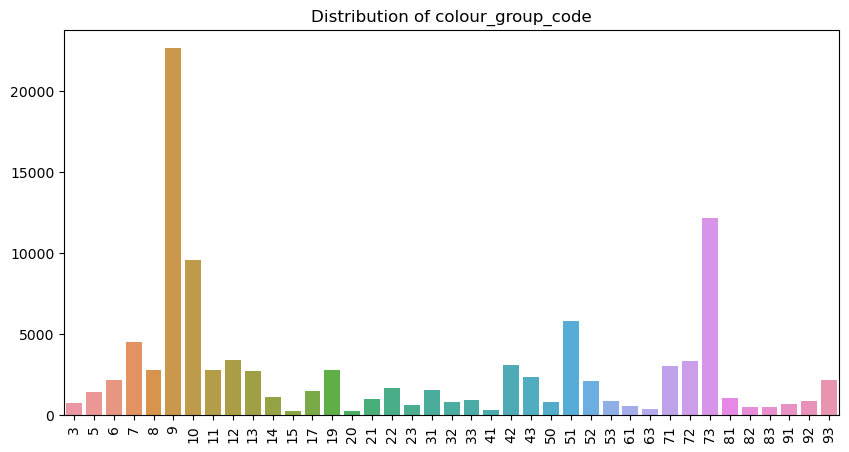

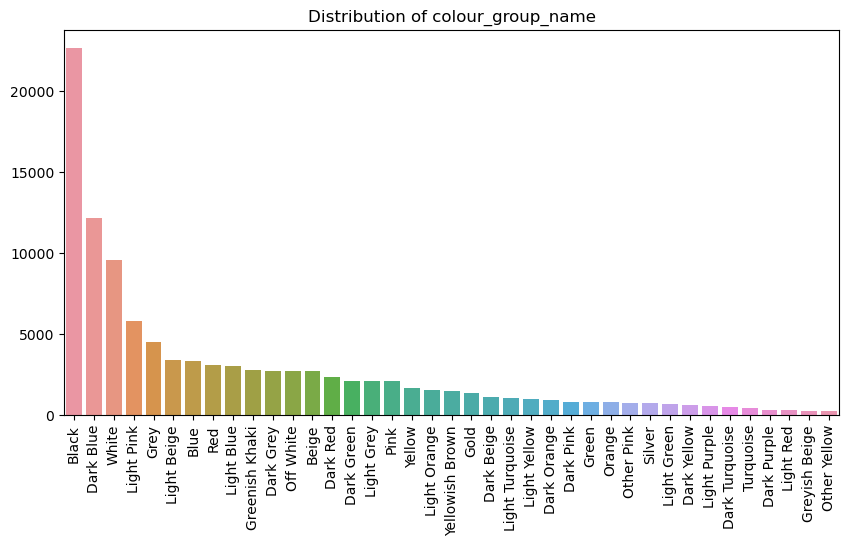

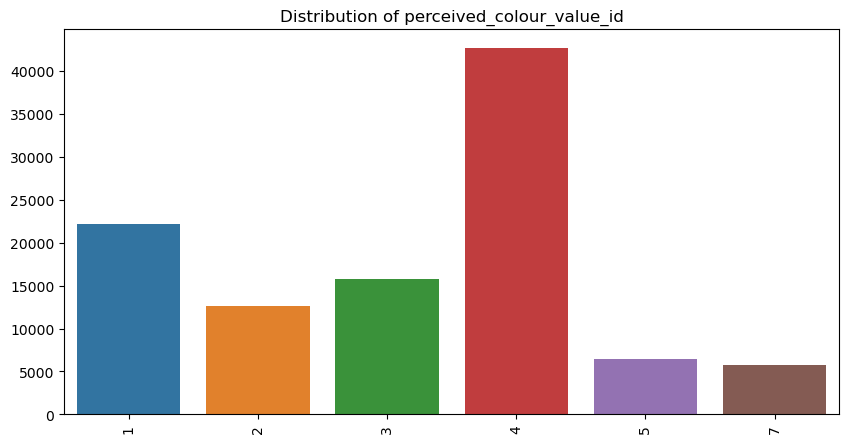

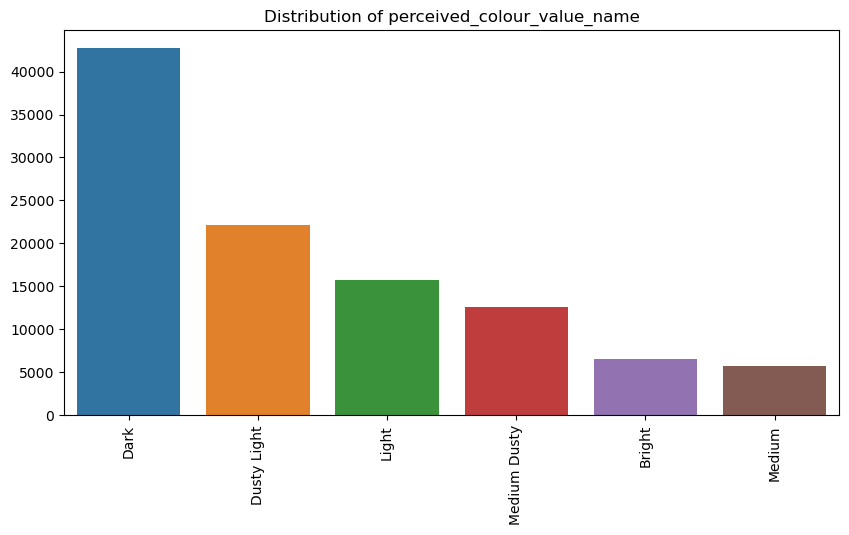

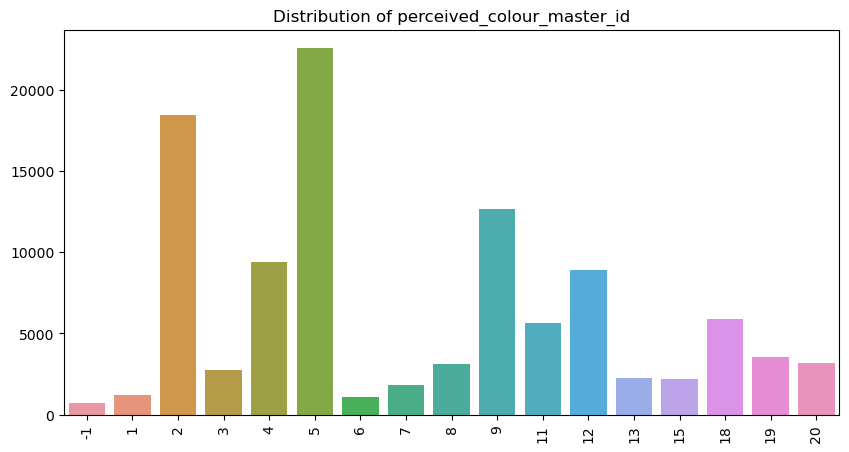

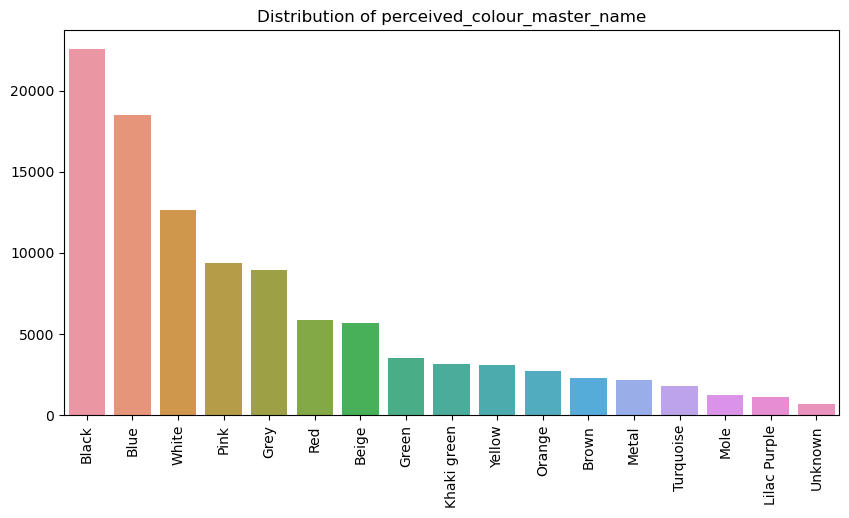

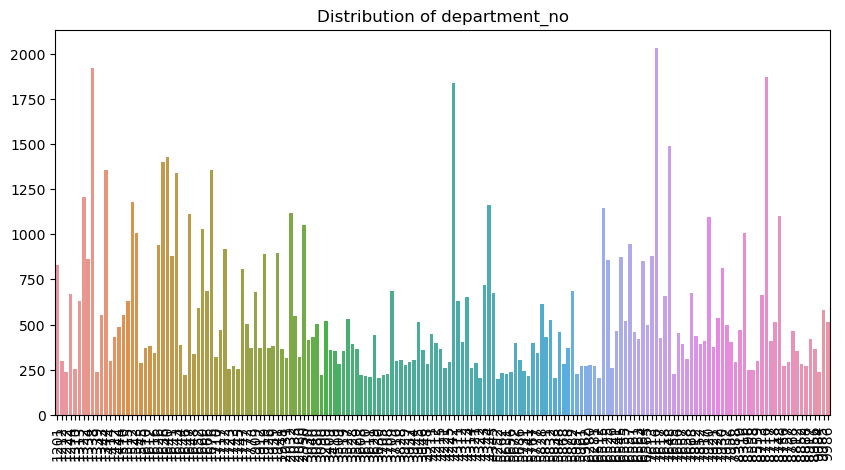

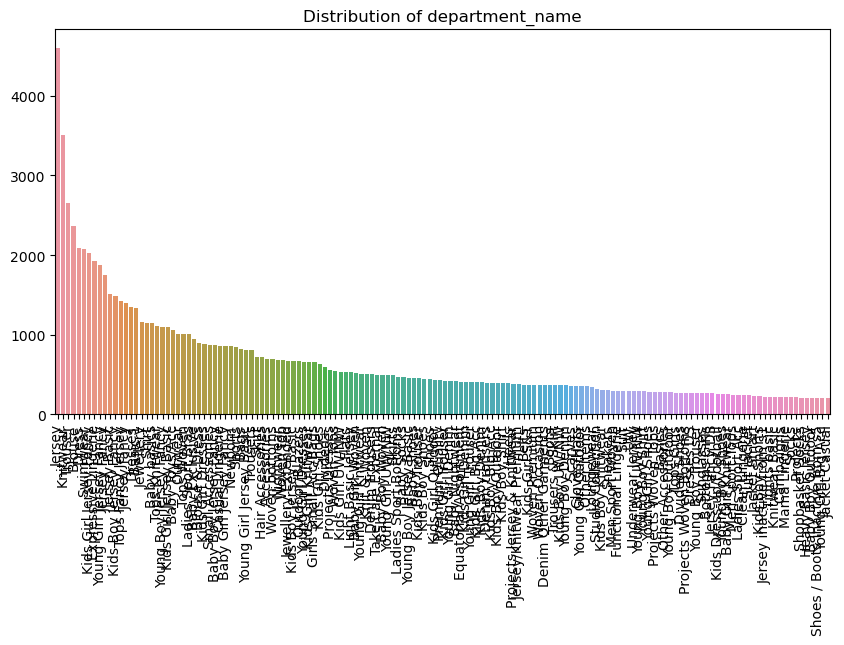

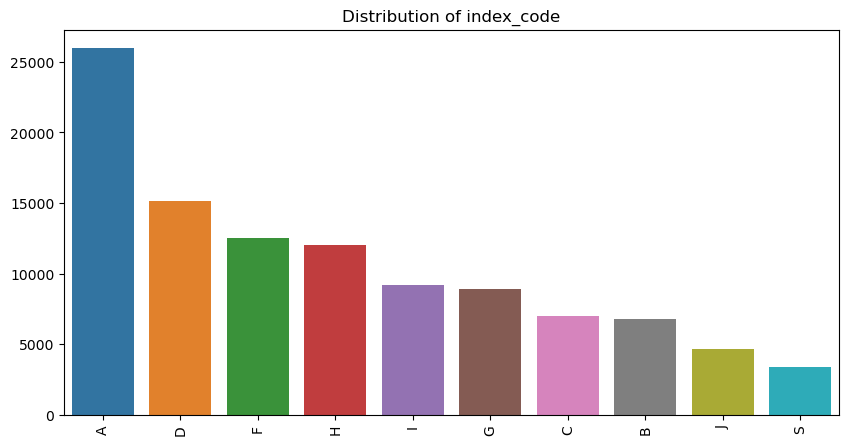

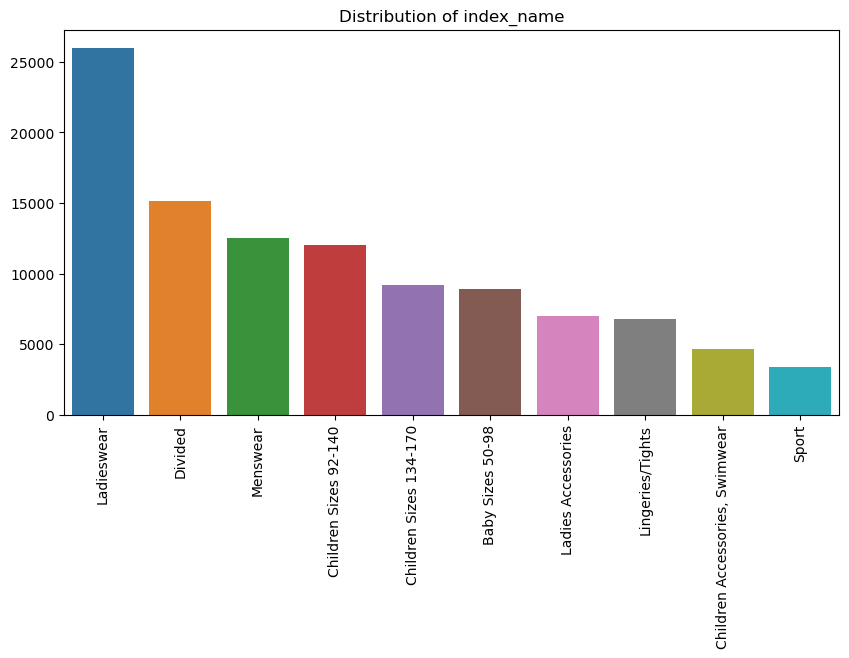

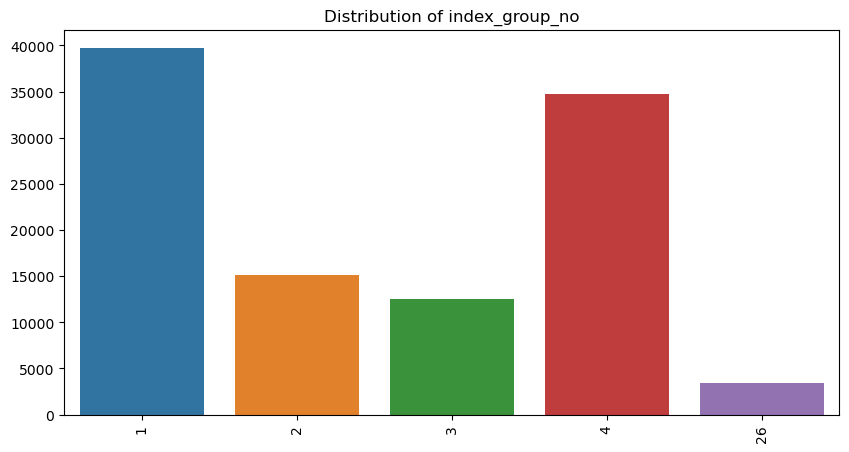

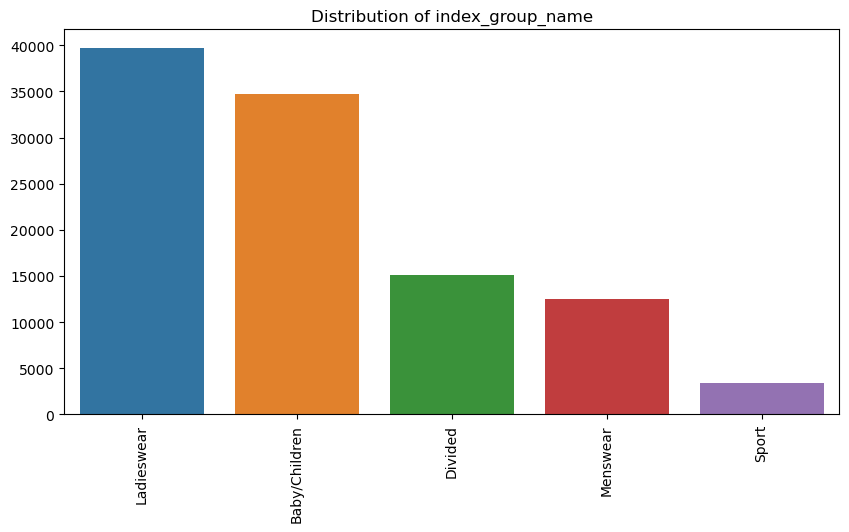

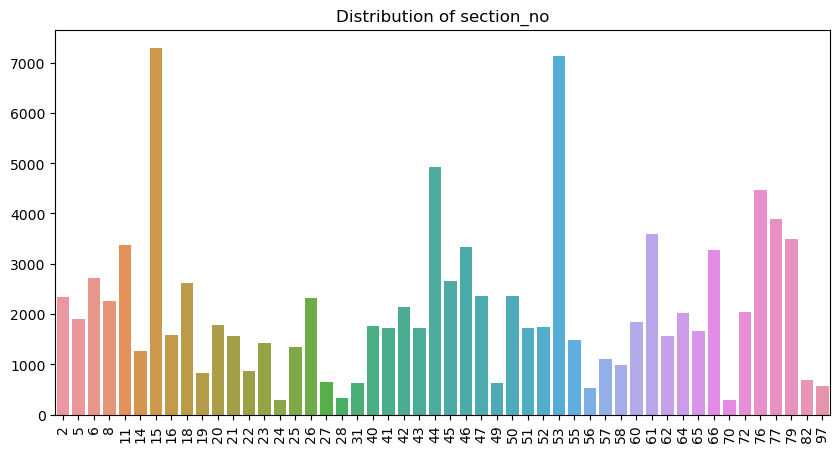

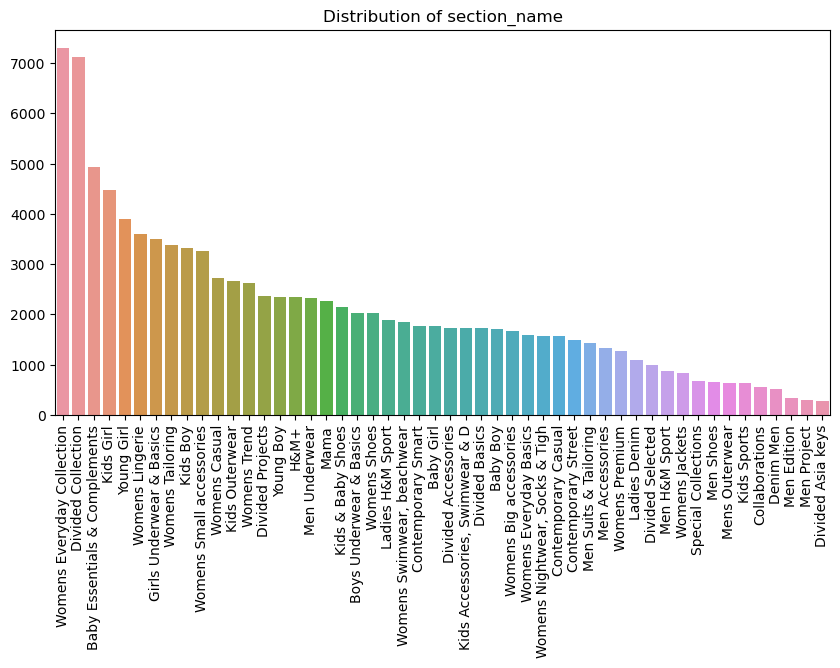

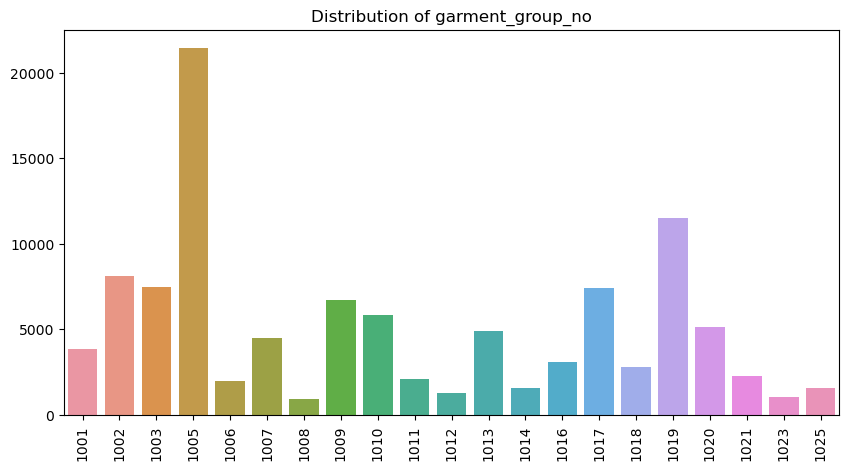

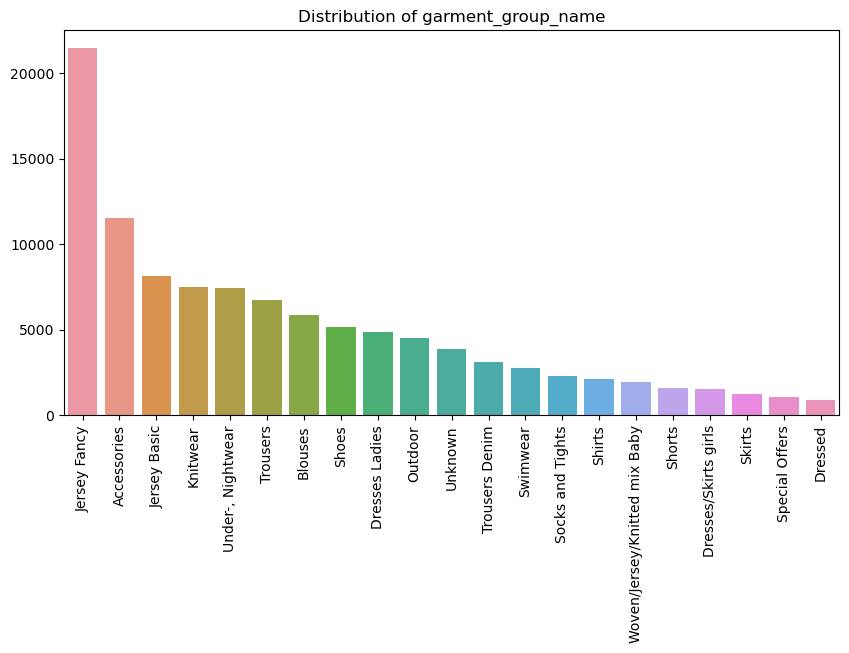

In [11]:
# Distribution of product types
columns_to_plot = articles.columns

for col in columns_to_plot:
    counts = articles[col].value_counts()
    counts = counts[counts > 200]  # Only keep counts of categories that are more than 100

    if len(counts) > 0:
        plt.figure(figsize=(10,5))
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.show()

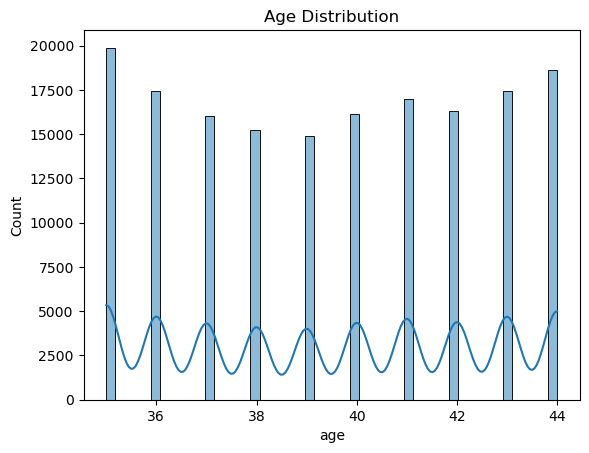

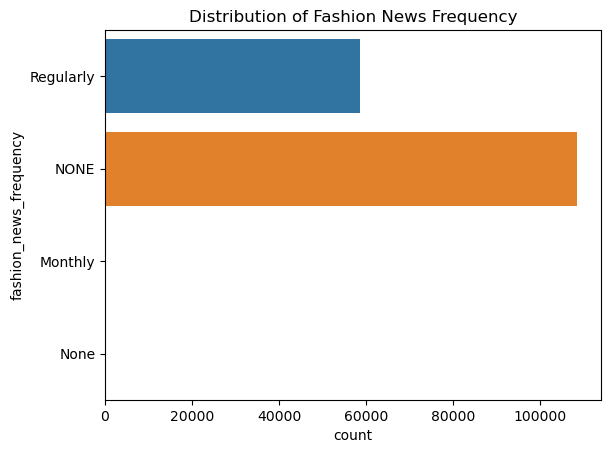

In [12]:
# Age distribution
sns.histplot(customers['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of fashion news frequency
sns.countplot(y='fashion_news_frequency', data=customers)
plt.title('Distribution of Fashion News Frequency')
plt.show()

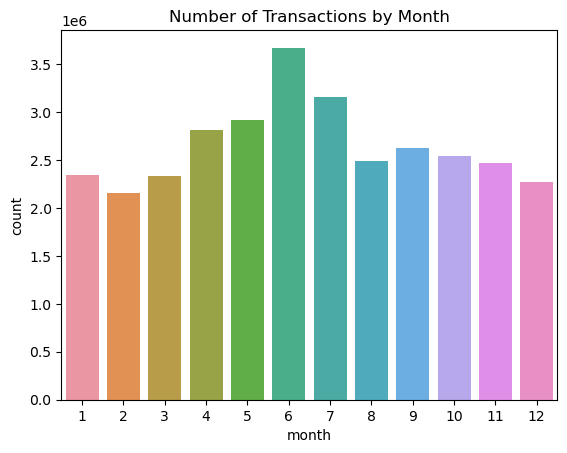

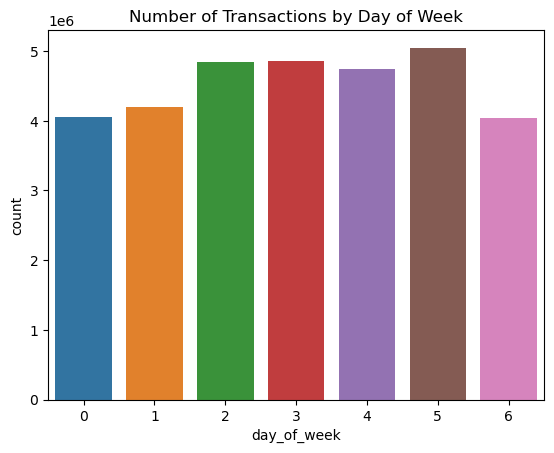

In [14]:
# Monthly Transactions
sns.countplot(x='month', data=transactions)
plt.title('Number of Transactions by Month')
plt.show()

# Transactions by Day of Week
sns.countplot(x='day_of_week', data=transactions)
plt.title('Number of Transactions by Day of Week')
plt.show()

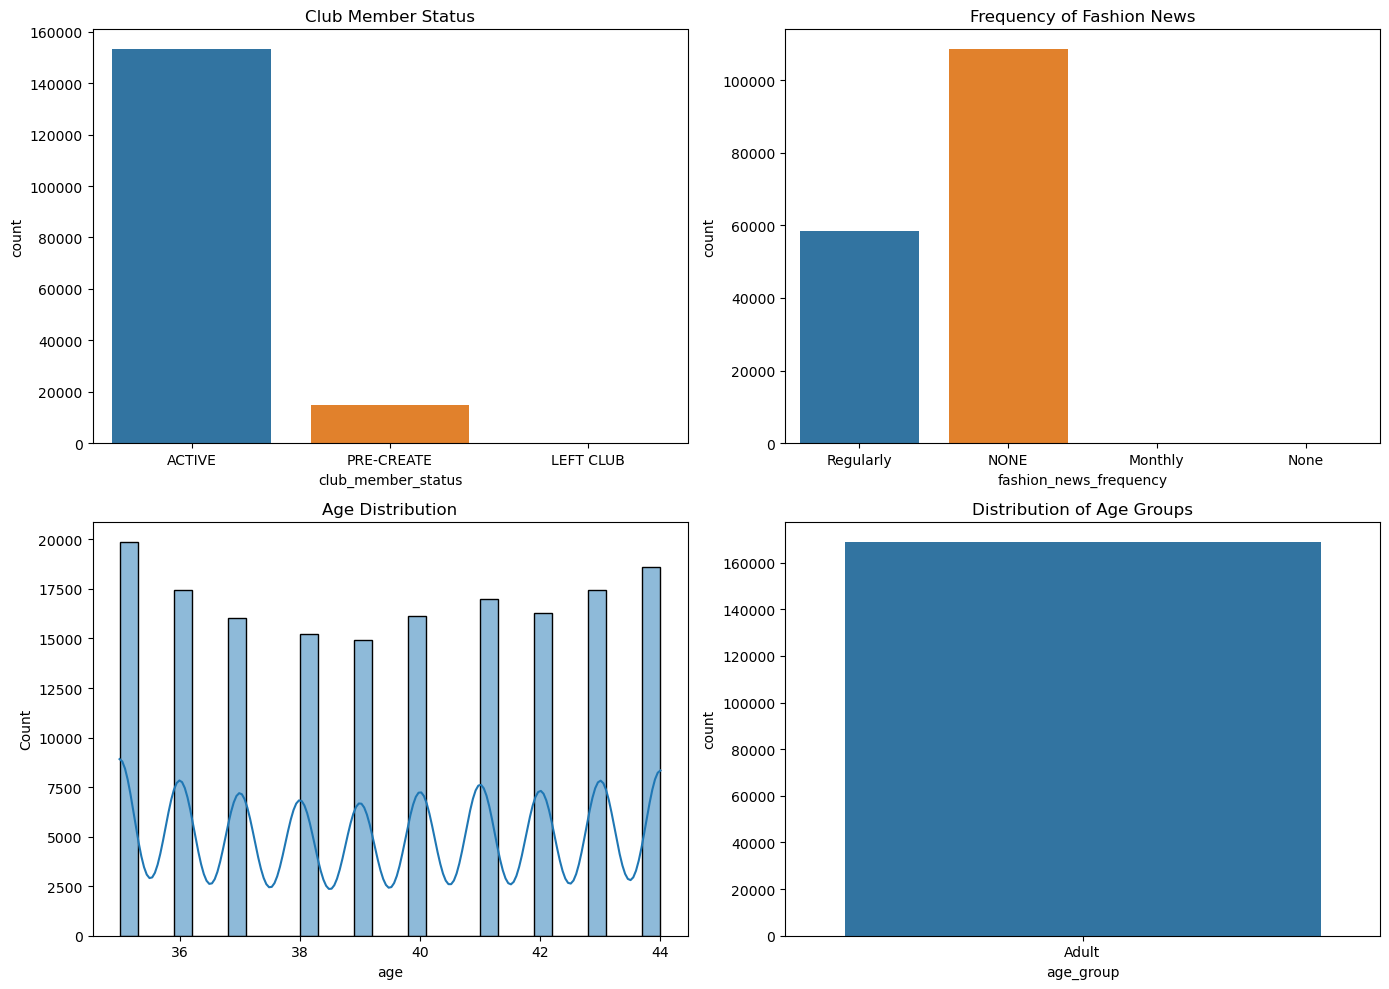

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(14,10))

# Club Member Status
sns.countplot(ax=ax[0,0], x='club_member_status', data=customers)
ax[0,0].set_title('Club Member Status')

# Fashion News Frequency
sns.countplot(ax=ax[0,1], x='fashion_news_frequency', data=customers)
ax[0,1].set_title('Frequency of Fashion News')

# Age Distribution
sns.histplot(ax=ax[1,0], x='age', data=customers, kde=True, bins=30)
ax[1,0].set_title('Age Distribution')

# Age Group
sns.countplot(ax=ax[1,1], x='age_group', data=customers)
ax[1,1].set_title('Distribution of Age Groups')

plt.tight_layout()
plt.show()


Notebook Color Scheme:


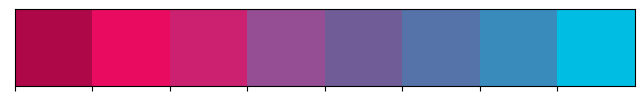

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries
import os
import gc
import wandb
import time
import random
import math
import glob
from scipy import spatial
from tqdm import tqdm
import plotly.express as px
import warnings
#import cv2
import pandas as pd
import numpy as np
from numpy import dot, sqrt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from IPython.display import display_html
from PIL import Image
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
plt.rcParams.update({'font.size': 16})

# Environment check
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'HandM', '_wandb_kernel': 'aot'}

# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'
    
my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

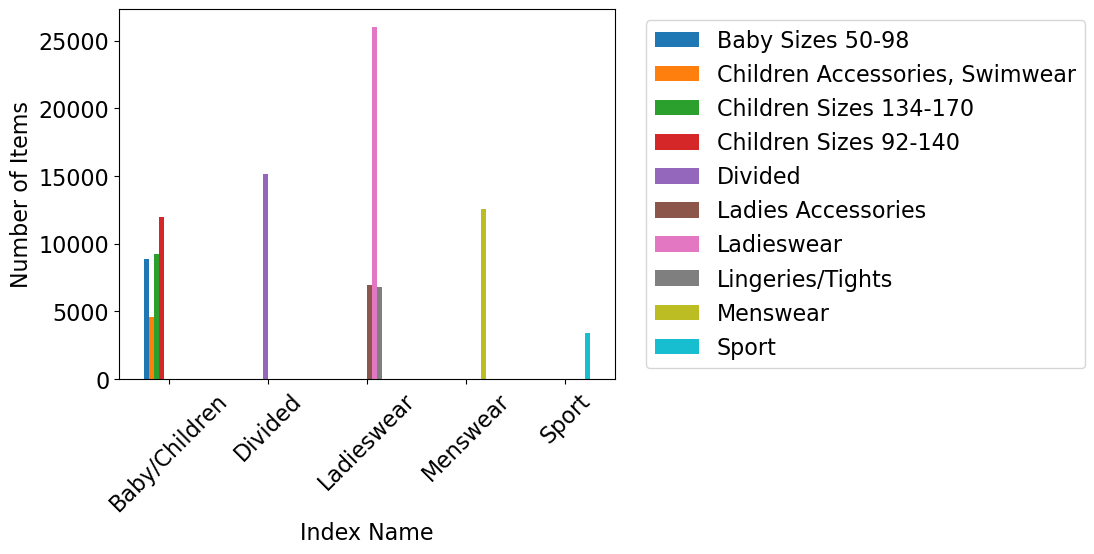

In [17]:
cross_tab = pd.crosstab(articles['index_group_name'], articles['index_name'])

ax = cross_tab.plot.bar()

ax.set_xlabel('Index Name')
ax.set_ylabel('Number of Items')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.legend(bbox_to_anchor=(1.04, 0.5), loc='center left')
plt.show()

In [18]:
group_df=articles.groupby(['index_group_name', 'index_name','section_name']).count()['article_id']

In [19]:
group_df

index_group_name  index_name        section_name                 
Baby/Children     Baby Sizes 50-98  Baby Boy                         1717
                                    Baby Essentials & Complements    4932
                                    Baby Girl                        1760
                                    Kids & Baby Shoes                 457
                                    Kids Local Relevance                9
                                                                     ... 
Menswear          Menswear          Men Underwear                    2322
                                    Mens Outerwear                    629
Sport             Sport             Kids Sports                       626
                                    Ladies H&M Sport                 1894
                                    Men H&M Sport                     872
Name: article_id, Length: 64, dtype: int64

In [21]:
# Data
basket = transactions.groupby("customer_id").agg({'article_id':'count', 
                                                  'price': 'sum'}).reset_index()
basket.columns = ["customer_id", "units", "order_price"]
# Get data
top_sold_products = transactions["article_id"].value_counts().reset_index().head(15)
top_sold_products.columns = ["article_id", "count"]
top_sold_products = pd.merge(top_sold_products, articles, on="article_id")[["article_id", "count", "prod_name"]]

clrs = ["#E90B60" if x==max(top_sold_products["count"]) else '#AF0848' for x in top_sold_products["count"]]

print(clr.S+"=== UNITS/ORDER ==="+clr.E)
print(clr.S+"Maximum Units/Order is:"+clr.E, basket["units"].max(), "\n" +
      clr.S+"Minimum Units/Order is:"+clr.E, basket["units"].min(), "\n" +
      clr.S+"Average Units/Order is:"+clr.E, basket["units"].mean(), "\n")

print(clr.S+"=== SPENDING/ORDER ==="+clr.E)
print(clr.S+"Maximum Spending/Order is:"+clr.E, basket["order_price"].max(), "\n" +
      clr.S+"Minimum Spending/Order is:"+clr.E, basket["order_price"].min(), "\n" +
      clr.S+"Average Spending/Order is:"+clr.E, basket["order_price"].mean())

=== UNITS/ORDER ===
Maximum Units/Order is: 1895 
Minimum Units/Order is: 1 
Average Units/Order is: 23.334630667241193 

=== SPENDING/ORDER ===
Maximum Spending/Order is: 34029.07999999994 
Minimum Spending/Order is: 0.449999999999953 
Average Spending/Order is: 383.13763804237107


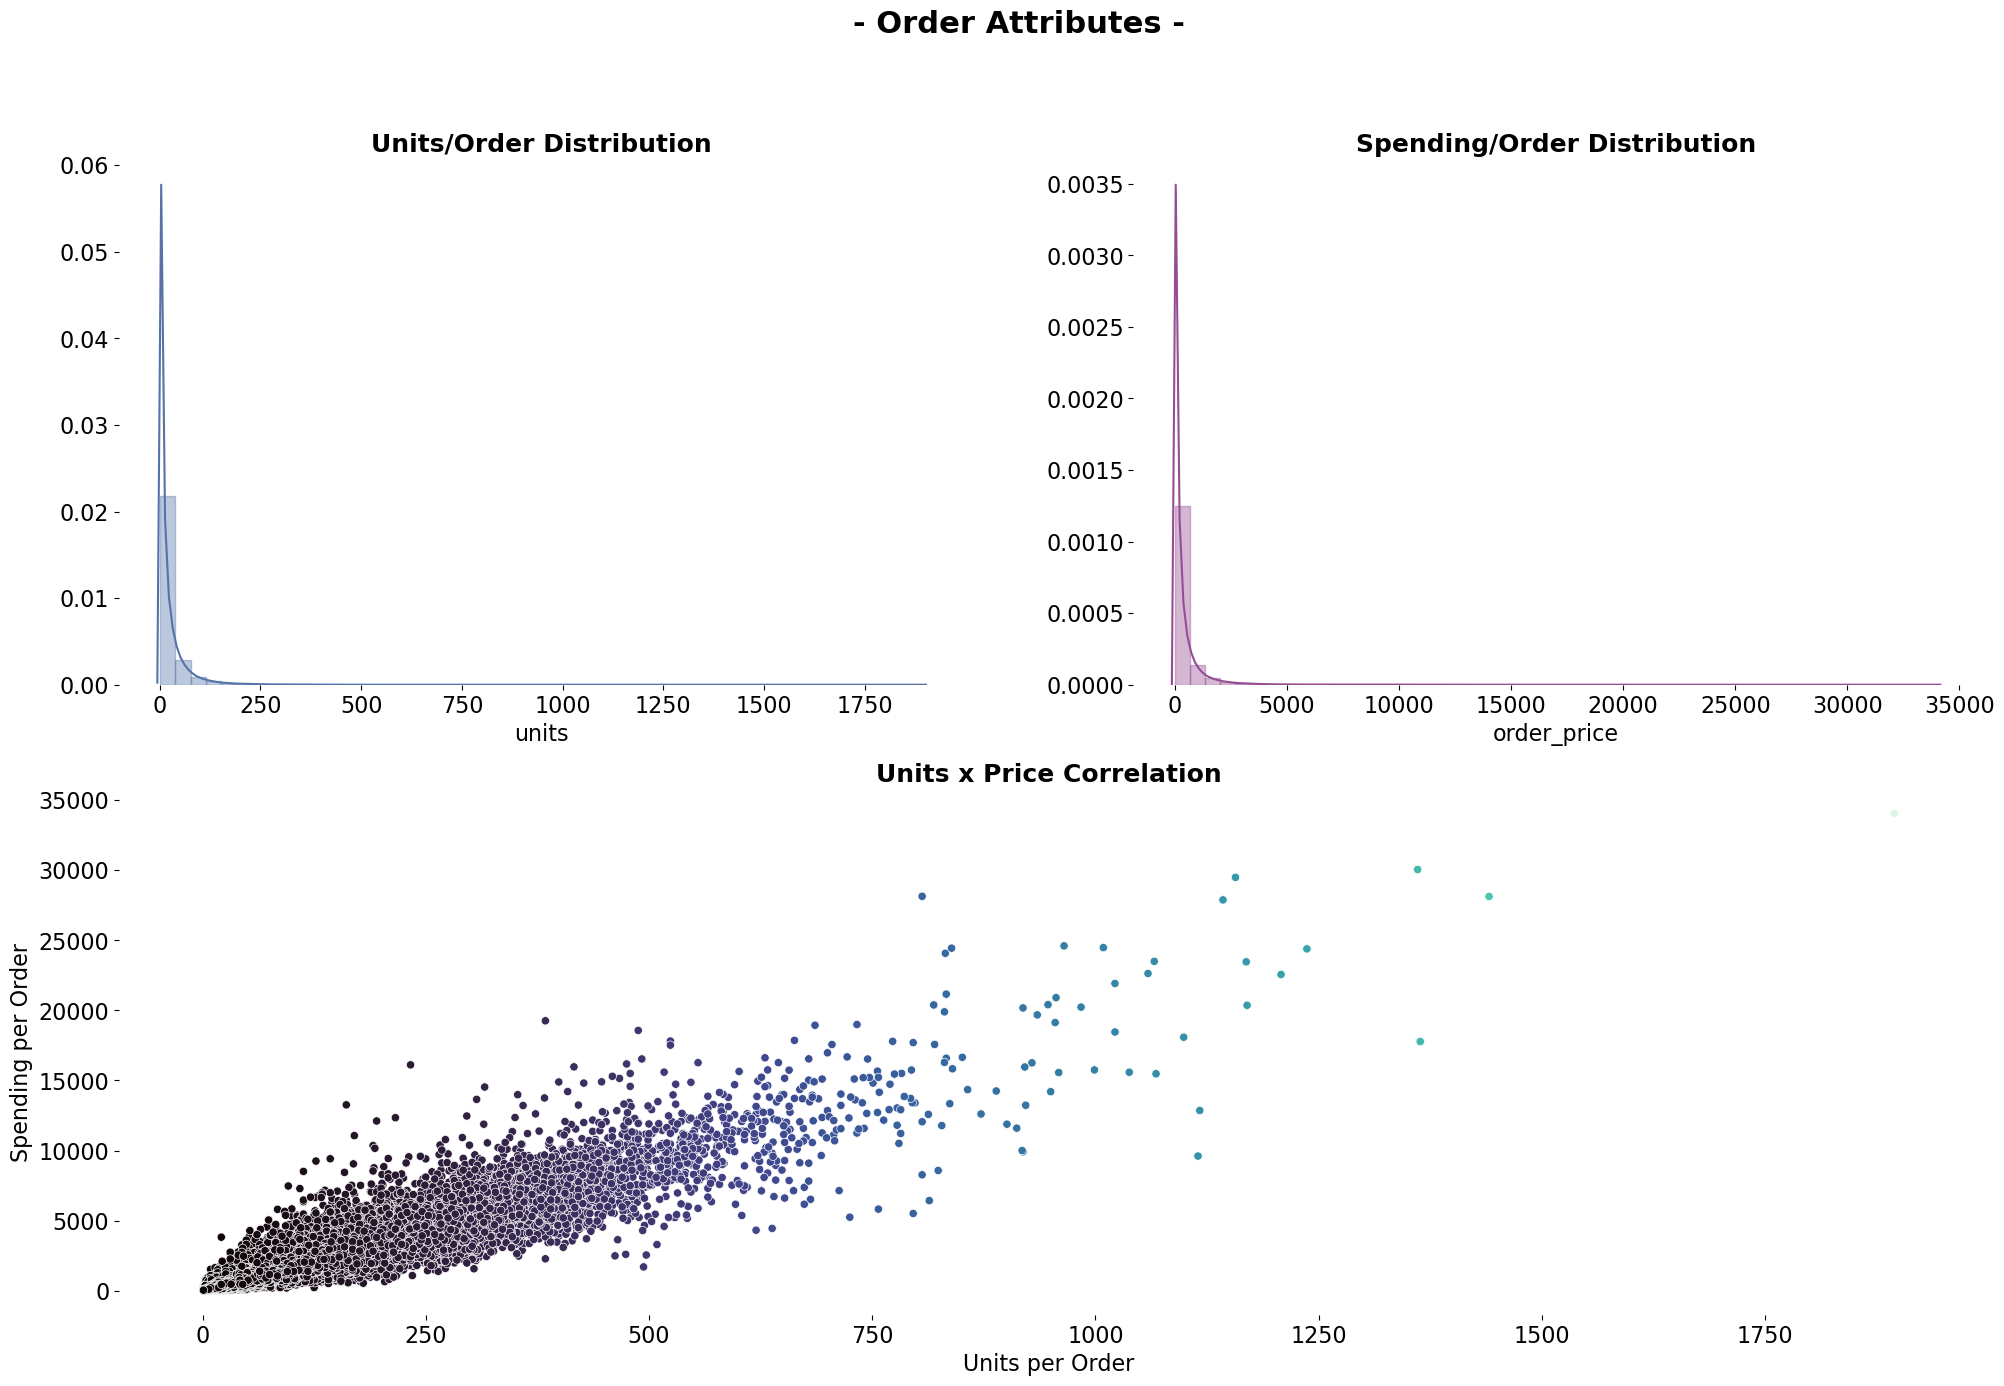

In [22]:
# Plot
plt.figure(figsize=(24, 15))
plt.suptitle('- Order Attributes -', size=22, weight="bold")

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)

sns.distplot(basket["units"], color=my_colors[-3], ax=ax1,
             hist_kws=dict(edgecolor=my_colors[-3]))
ax1.set_title("Units/Order Distribution", size=18, weight="bold")
ax1.set_ylabel("")

sns.distplot(basket["order_price"], color=my_colors[-5], ax=ax2,
             hist_kws=dict(edgecolor=my_colors[-5]))
ax2.set_title("Spending/Order Distribution", size=18, weight="bold")
ax2.set_ylabel("")

sns.scatterplot(data=basket, x="units", y="order_price", hue="units", palette="mako", 
                legend=None, ax=ax3)
ax3.set_title("Units x Price Correlation", size=18, weight="bold")
ax3.set_ylabel("Spending per Order")
ax3.set_xlabel("Units per Order")

sns.despine(left=True, bottom=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None);

In [23]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean          16.4193
std           11.3169
min            0.0100
25%            9.3300
50%           14.9900
75%           19.9900
max          349.0000
Name: price, dtype: float64

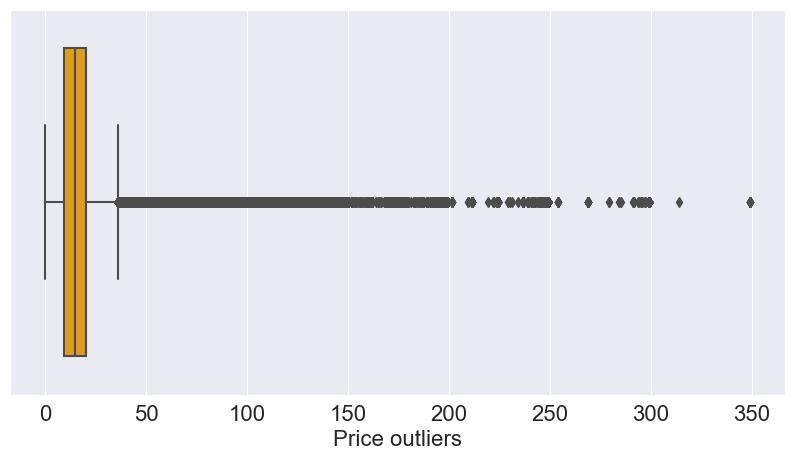

In [24]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

In [25]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

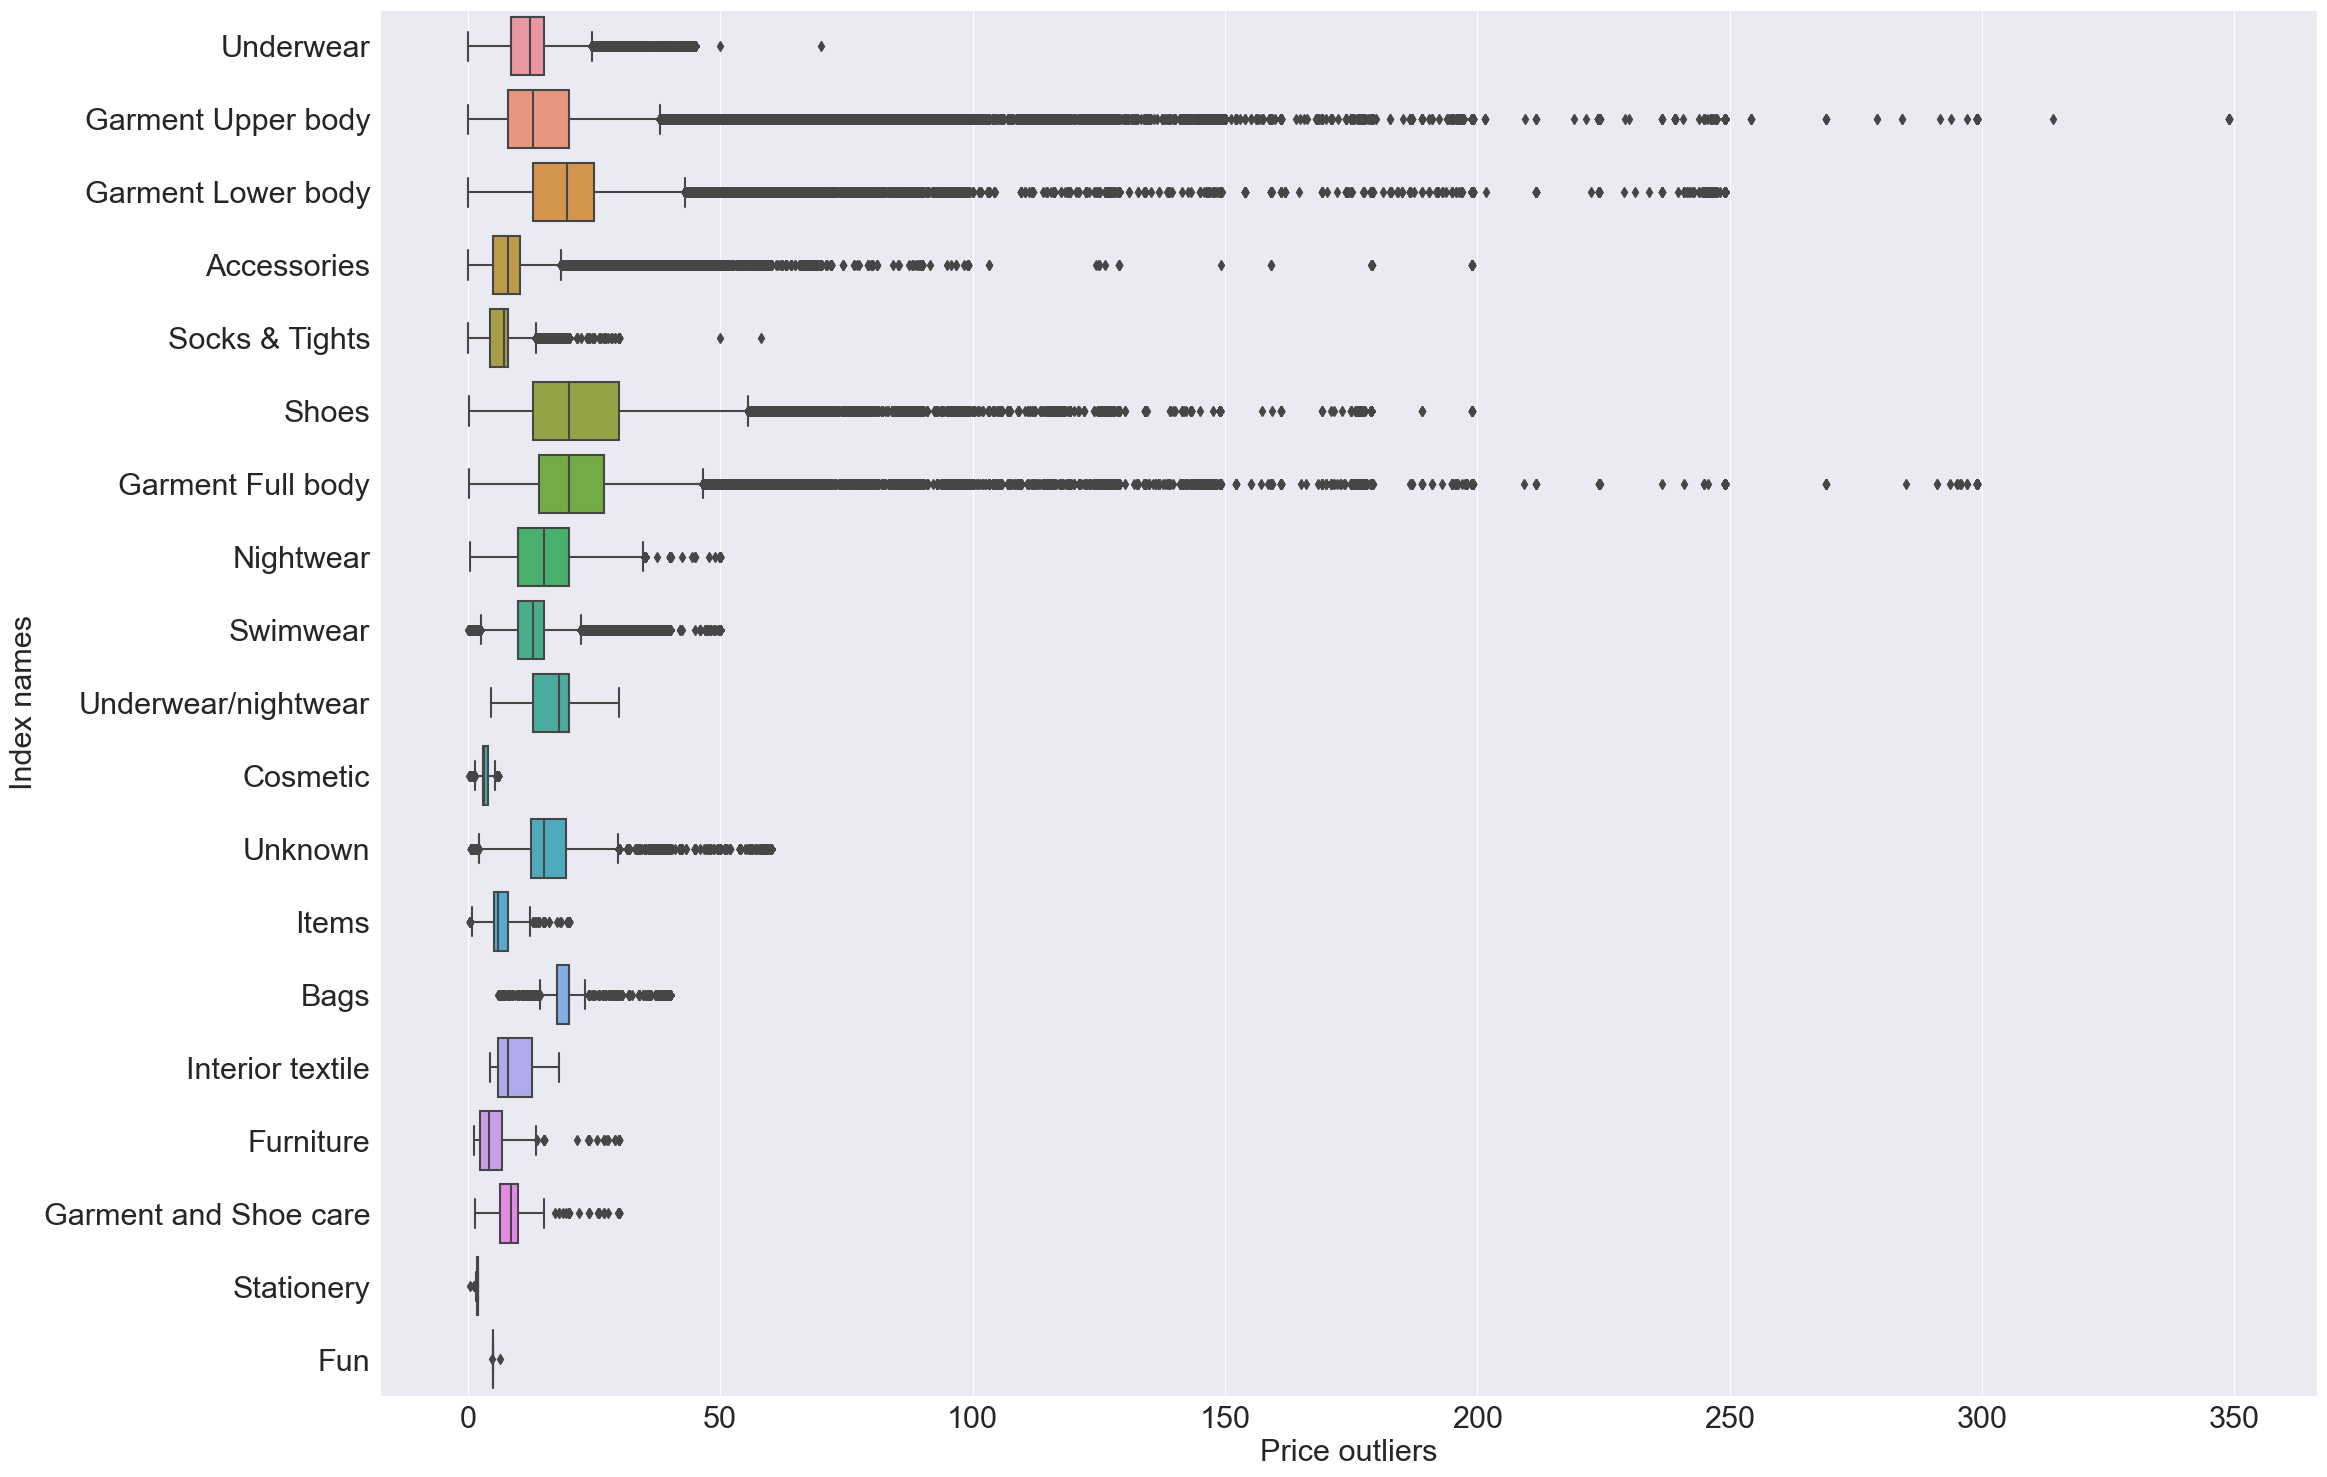

In [26]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

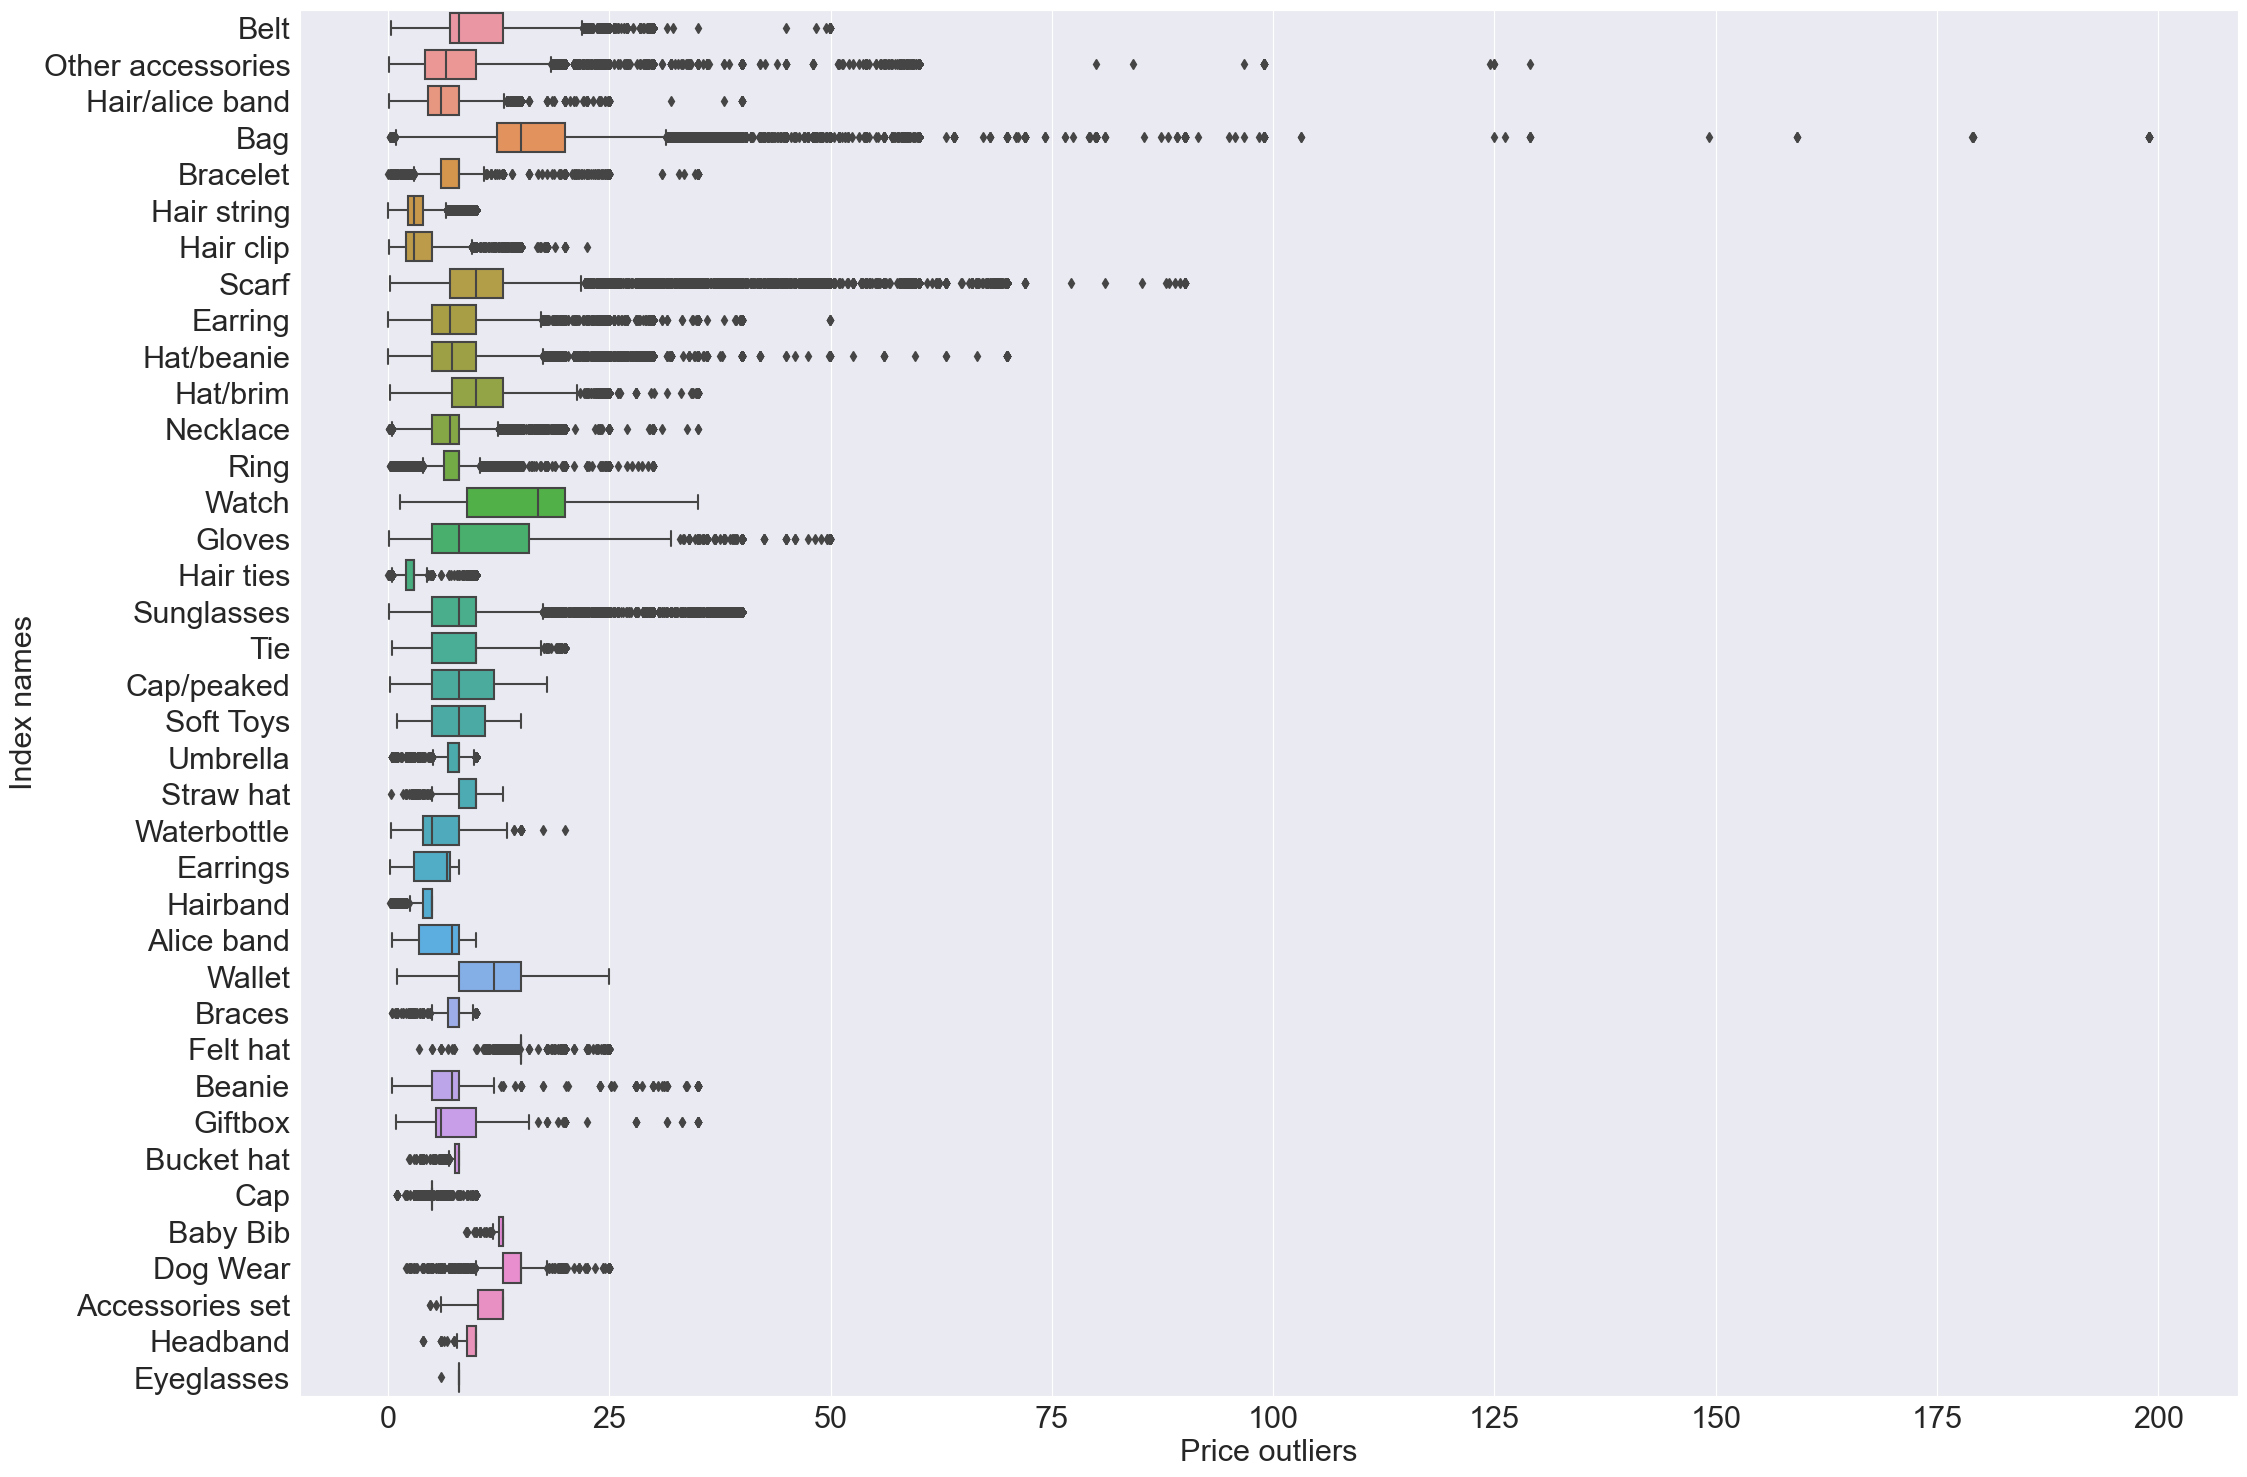

In [27]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

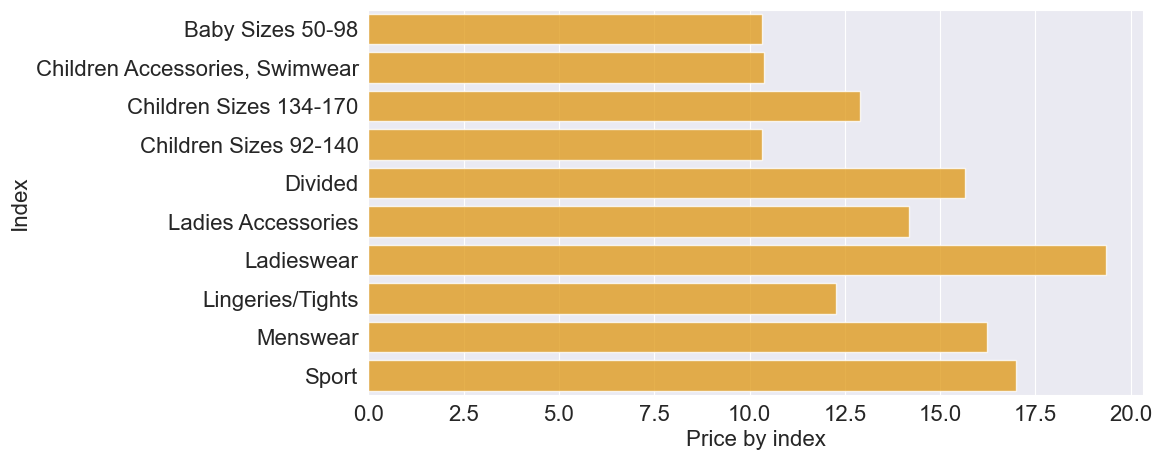

In [28]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

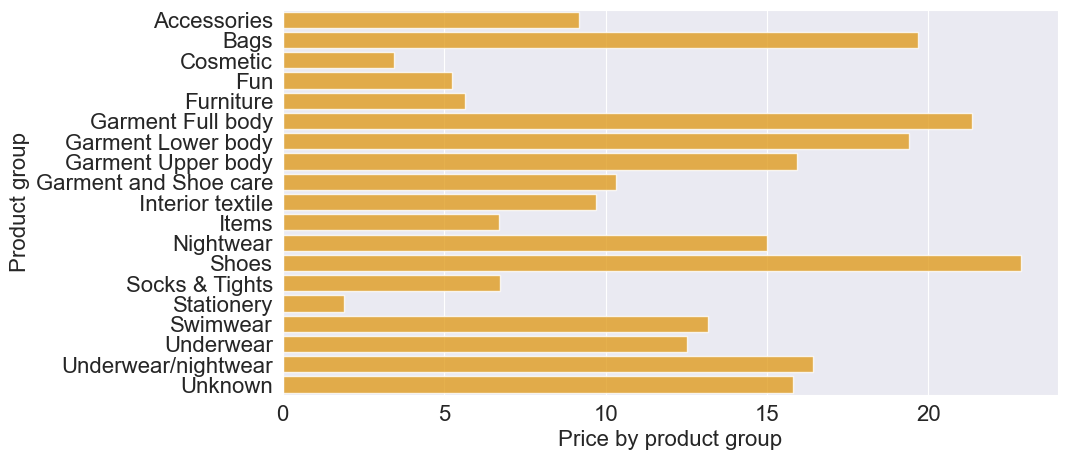

In [29]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

In [30]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

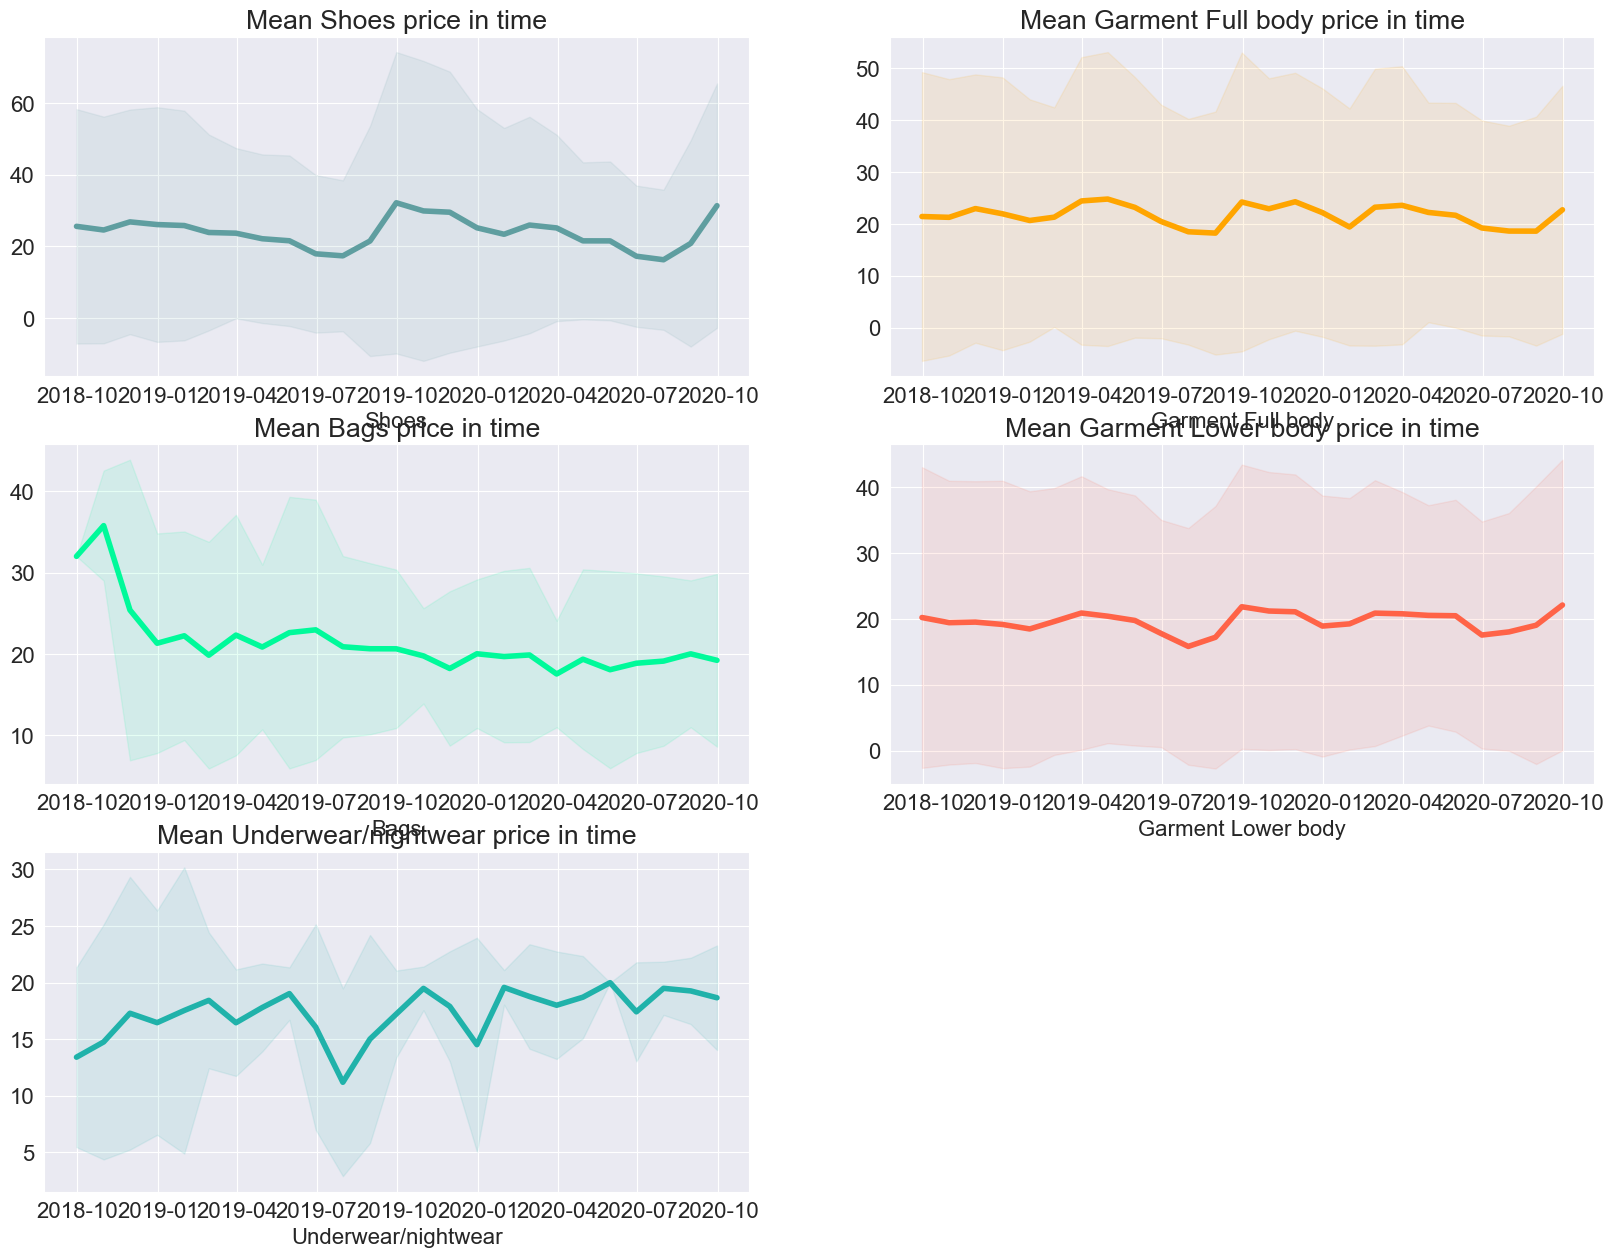

In [31]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

In [33]:
transactions['InvoiceDate'] = pd.to_datetime(transactions['t_dat'],format='%Y-%m-%d')

In [35]:
import datetime as dt
start_date = dt.datetime(2020,6,1)

# Filter transactions by date
transactions["t_dat"] = pd.to_datetime(transactions["InvoiceDate"])
transactions = transactions.loc[transactions["t_dat"] >= start_date]

In [36]:
# Filter transactions by date
transactions["t_dat"] = pd.to_datetime(transactions["InvoiceDate"])
transactions = transactions.loc[transactions["t_dat"] >= start_date]

In [37]:
analysis_date=dt.datetime(2020,9,23)
print((analysis_date).date())

2020-09-23


In [38]:
transactions['date']=transactions['InvoiceDate']

In [39]:
rfm = transactions.groupby('customer_id').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'date': 'count',
    'price': 'sum'})
#rfm.head()
rfm.columns=["Recency","Frequency","Monetary"]
rfm = rfm[rfm["Monetary"] > 0]

In [40]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,1,29.9900,4,1,2
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,1,15.9900,2,1,1
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,1,35.9900,5,1,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,150.9300,3,3,4
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,44.9800,5,1,2


In [41]:
#RFM - The value of 2 different variables that were formed was recorded as a RFM_SCORE
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

#### The seg_map dictionary provides a mapping between regular expressions and segment names. It is used to assign meaningful segments to customers based on their RFM scores. Here's the rationale behind the seg_map:

- 'hibernating': This segment represents customers with low recency scores (1 or 2) and low frequency scores (1 or 2). These customers haven't made a purchase recently and have made only a few purchases in the past. They are considered inactive or dormant.

- 'at_Risk': Customers falling into this segment have low recency scores (1 or 2) but moderate frequency scores (3 or 4). They haven't made a purchase recently, but they have shown some level of activity in the past. They are considered at risk of becoming dormant.

- 'cant_loose': This segment includes customers with a recency score of 1 or 2 and a frequency score of 5. They haven't made a purchase recently, but they have been highly active and frequent buyers in the past. The term "can't loose" implies that the business can't afford to lose these valuable customers.

- 'about_to_sleep': Customers falling into this segment have a recency score of 3 and a frequency score of 1 or 2. They haven't made a purchase recently, and their overall purchase frequency is low. They are considered to be on the verge of becoming inactive.

- 'need_attention': This segment represents customers with a recency score of 3 and a frequency score of 3. They haven't made a purchase recently, and their purchase frequency is average. These customers require attention to prevent them from becoming dormant.

- 'loyal_customers': Customers falling into this segment have a recency score of 3 or 4 and a frequency score of 4 or 5. They have made purchases recently and are consistently frequent buyers. They are considered loyal and valuable to the business.

- 'promising': This segment includes customers with a recency score of 4 and a frequency score of 1. They have made a recent purchase but haven't exhibited high purchase frequency yet. They show potential and are considered promising.

- 'new_customers': Customers in this segment have a recency score of 5 and a frequency score of 1. They are new to the business and have made a recent purchase. They require nurturing and further engagement to convert them into loyal customers.

- 'potential_loyalists': This segment represents customers with a recency score of 4 or 5 and a frequency score of 2 or 3. They have made recent purchases and show moderate purchase frequency. They have the potential to become loyal customers with further engagement.

- 'champions': Customers falling into this segment have a recency score of 5 and a frequency score of 4 or 5. They have made recent purchases and are highly frequent buyers. They are considered champions and the most valuable customers.

In [42]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,1,29.9900,4,1,2,41,promising
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,1,15.9900,2,1,1,21,hibernating
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,1,35.9900,5,1,2,51,new_customers
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,150.9300,3,3,4,33,need_attention
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,44.9800,5,1,2,51,new_customers


In [43]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599002 entries, 00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657 to ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Recency          599002 non-null  int64   
 1   Frequency        599002 non-null  int64   
 2   Monetary         599002 non-null  float64 
 3   recency_score    599002 non-null  category
 4   frequency_score  599002 non-null  category
 5   monetary_score   599002 non-null  category
 6   RFM_SCORE        599002 non-null  object  
 7   segment          599002 non-null  object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 29.1+ MB


In [44]:
rfm[["segment", "Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

Recency              Frequency              Monetary  \
                       mean   count  max      mean   count  max     mean   
segment                                                                    
about_to_sleep      42.0000   46465   53    2.0000   46465    4  34.0000   
at_Risk             80.0000   89593  114    7.0000   89593   13  96.0000   
cant_loose          76.0000   20412  114   20.0000   20412  161 279.0000   
champions            7.0000   74897   14   21.0000   74897  391 344.0000   
hibernating         84.0000  125199  114    2.0000  125199    4  33.0000   
loyal_customers     31.0000  105776   53   16.0000  105776  254 239.0000   
need_attention      42.0000   26279   53    5.0000   26279    7  76.0000   
new_customers        8.0000   15500   14    1.0000   15500    2  31.0000   
potential_loyalists 15.0000   77664   29    4.0000   77664    7  75.0000   
promising           22.0000   17217   29    1.0000   17217    2  29.0000   

                                        
                      count        max  
segment                                 
about_to_sleep        46465   598.0000  
at_Risk               89593   845.0000  
cant_loose            20412  2619.0000  
champions             74897 11155.0000  
hibernating          125199   597.0000  
loyal_customers      105776  3977.0000  
need_attention        26279   676.0000  
new_customers         15500   498.0000  
potential_loyalists   77664   857.0000  
promising             17217   378.0000

In [45]:
x = rfm.segment.value_counts()
fig = px.treemap(x, path=[x.index], values=x)
fig.update_layout(title_text='Distribution of the RFM Segments', title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()

In [46]:
rfm = rfm.reset_index()

In [47]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert customer IDs to numerical labels
rfm['customer_id_numerical'] = label_encoder.fit_transform(rfm.customer_id)

# Print the updated DataFrame
print(rfm.head())

                                         customer_id  Recency  Frequency  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...       18          1   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...       77          1   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...        8          1   
3  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...       42          7   
4  0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...        9          2   

   Monetary recency_score frequency_score monetary_score RFM_SCORE  \
0   29.9900             4               1              2        41   
1   15.9900             2               1              1        21   
2   35.9900             5               1              2        51   
3  150.9300             3               3              4        33   
4   44.9800             5               1              2        51   

          segment  customer_id_numerical  
0       promising                      0  
1     hibernating                   

In [48]:
data_clustering = rfm[['customer_id_numerical','Recency', 'Frequency', 'Monetary']]

In [49]:
from sklearn.cluster import KMeans

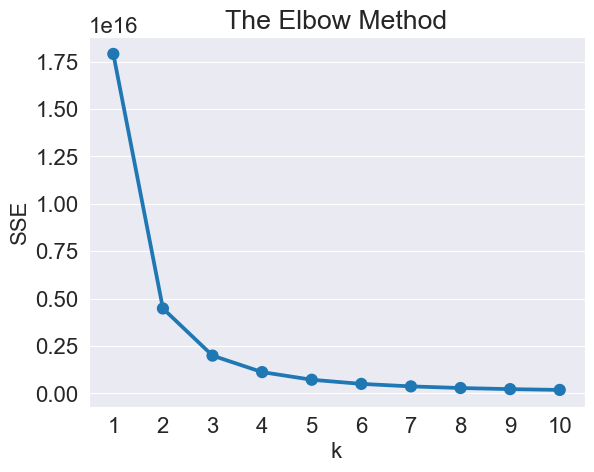

In [50]:
# decide how many groups (K) with Elbow criterion method

#fit Kmeans and calculate SSE for each K
sse = {}

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_clustering)
    sse[k] = kmeans.inertia_
    
    
# plot sse 
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [51]:
model = KMeans(n_clusters=4, random_state=40)
model.fit(data_clustering)

KMeans(n_clusters=4, random_state=40)

In [52]:
data_clustering["Cluster"] = model.labels_
data_clustering.head()

,customer_id_numerical,Recency,Frequency,Monetary,Cluster
0,0,18,1,29.9900,1
1,1,77,1,15.9900,1
2,2,8,1,35.9900,1
3,3,42,7,150.9300,1
4,4,9,2,44.9800,1


In [53]:
data_clustering.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary        
           mean      mean     mean   count
Cluster                                   
0       46.3000    8.6000 133.6000  148773
1       46.3000    8.6000 133.7000  151864
2       46.3000    8.6000 132.5000  147987
3       46.3000    8.6000 133.6000  150378

In [54]:
rfm_ = pd.melt(data_clustering.reset_index(),
                      id_vars=['customer_id_numerical', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm_.head()


,customer_id_numerical,Cluster,Attribute,Value
0,0,1,Recency,18.0000
1,1,1,Recency,77.0000
2,2,1,Recency,8.0000
3,3,1,Recency,42.0000
4,4,1,Recency,9.0000


In [55]:
rfm_['Attribute'].nunique()

3